In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
photoReceptor = "photoReceptor.xlsx"

pr = pd.read_excel(photoReceptor)

pr.index = pr['nm']
pr.drop(columns=['nm'],inplace=True)
pr

,erythropic,chloropic,rhodopic,melanopic,cyanopic,photopic
nm,,,,,,
380,6.776693e-06,7.855163e-06,1.030120e-05,1.047213e-05,9.731193e-05,0.000039
385,1.187309e-05,1.358435e-05,1.807308e-05,1.901568e-05,1.893795e-04,0.000064
390,2.064335e-05,2.338654e-05,3.207029e-05,3.529337e-05,3.654829e-04,0.000120
395,3.564577e-05,4.018610e-05,5.784609e-05,6.706839e-05,6.985424e-04,0.000217
400,6.119717e-05,6.915980e-05,1.064557e-04,1.303387e-04,1.321287e-03,0.000396
...,...,...,...,...,...,...
760,7.641239e-07,7.274873e-08,3.892860e-09,7.034337e-10,5.188991e-12,0.000060
765,5.515189e-07,5.332361e-08,2.912291e-09,5.314006e-10,4.065890e-12,0.000042
770,3.996772e-07,3.924340e-08,2.187042e-09,4.029249e-10,3.196159e-12,0.000030


Text(0, 0.5, 'response rate')

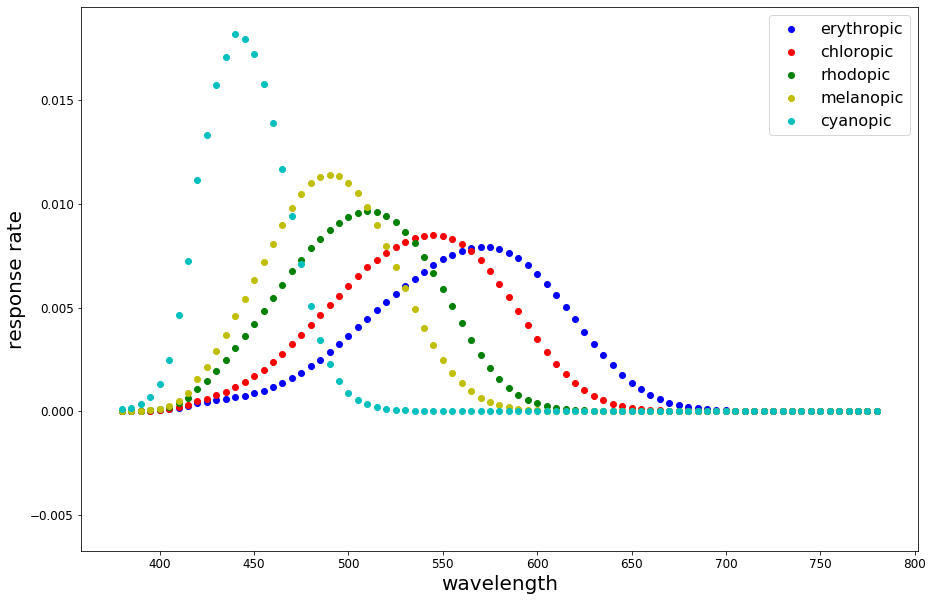

In [119]:
# pr=(pr-pr.min())/(pr.max()-pr.min())

fig= plt.figure(figsize=(15,10))
plt.scatter(pr.index,pr['erythropic'], c='b', label='erythropic')
plt.scatter(pr.index,pr['chloropic'], c='r', label='chloropic')
plt.scatter(pr.index,pr['rhodopic'], c='g', label='rhodopic')
plt.scatter(pr.index,pr['melanopic'], c='y', label='melanopic')
plt.scatter(pr.index,pr['cyanopic'], c='c', label='cyanopic')
plt.legend(loc='upper left')
# plt.xlim(pr['nm'])
#plt.title('winter colocate data', fontsize = 16)
plt.legend(fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.title('matching of 2 sensors values -- second trial',fontsize=16)
plt.xlabel('wavelength',fontsize=20)
plt.ylabel('response rate',fontsize=20)
#plt.xticks('time')
# plt.show()

In [4]:
spectralRes = "spectralRes.xlsx"

sR = pd.read_excel(spectralRes)

sR.index = sR['nm']
sR.drop(columns=['nm'],inplace=True)
sR

,Corneal,Cyanopic,Melanopic,Rhodopic,Chloropic,Erythropic
nm,,,,,,
380,1.409205,7.552567e-03,1.293883e-03,1.502014e-03,0.001303,0.001204
385,1.475084,1.538522e-02,2.459315e-03,2.758423e-03,0.002359,0.002208
390,1.540965,3.101803e-02,4.768387e-03,5.113377e-03,0.004242,0.004011
395,1.937239,7.452986e-02,1.139165e-02,1.159496e-02,0.009164,0.008707
400,2.333516,1.698095e-01,2.666673e-02,2.570348e-02,0.018996,0.018005
...,...,...,...,...,...,...
760,1.308896,3.740611e-10,8.072611e-08,5.272131e-07,0.000011,0.000126
765,1.596335,3.574653e-10,7.437578e-08,4.810284e-07,0.000010,0.000111
770,1.883773,3.315976e-10,6.654850e-08,4.262828e-07,0.000009,0.000095


Text(0, 0.5, 'response rate')

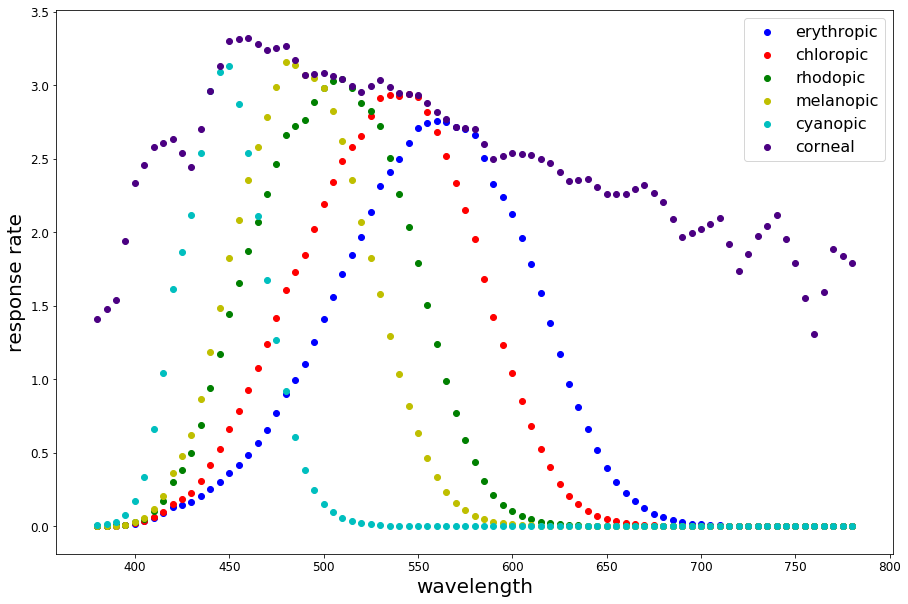

In [5]:
fig= plt.figure(figsize=(15,10))
plt.scatter(sR.index,sR['Erythropic'], c='b', label='erythropic')
plt.scatter(sR.index,sR['Chloropic'], c='r', label='chloropic')
plt.scatter(sR.index,sR['Rhodopic'], c='g', label='rhodopic')
plt.scatter(sR.index,sR['Melanopic'], c='y', label='melanopic')
plt.scatter(sR.index,sR['Cyanopic'], c='c', label='cyanopic')
plt.scatter(sR.index,sR['Corneal'], c='indigo', label='corneal')
plt.legend(loc='upper left')
# plt.xlim(pr['nm'])
#plt.title('winter colocate data', fontsize = 16)
plt.legend(fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.title('matching of 2 sensors values -- second trial',fontsize=16)
plt.xlabel('wavelength',fontsize=20)
plt.ylabel('response rate',fontsize=20)
#plt.xticks('time')
# plt.show()

In [6]:
# rodopsin: 496 nm
# cyan: 419 nm
#chloro: 530.8nm
# erythrolable: 558.4nm
# melanopsin 480nm 
#  0.40 for the rods, 0.30 for the cyan and 0.38 for the other cones

In [268]:
from scipy.optimize import curve_fit
photoreceptors = ['erythropic', 'chloropic', 'rhodopic', 'melanopic', 'cyanopic']
amplitude_five = []
mean_five = []
std_five = []
mse = []

In [269]:
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

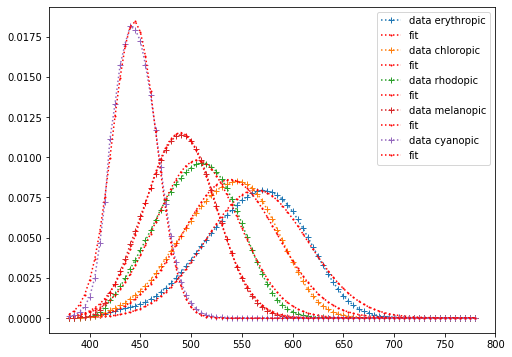

In [272]:
plt.figure(figsize=(8,6))
for i in range(len(photoreceptors)):
    x = np.array(pr.index)
    y = np.array(pr[photoreceptors[i]]).reshape(1,-1)[0]
    n = len(x)                          #the number of data
    mean = sum(x*y)/n                   #note this correction
    sigma = sum(y*(x-mean)**2)/n        #note this correction
    popt,pcov = curve_fit(gaus,x,y,p0=[1,mean,sigma])
    plt.plot(x,y,'+:',label='data {0}'.format(photoreceptors[i]))
    plt.plot(x,gaus(x,*popt),'ro:',markersize = 1,label='fit')
    plt.legend()
    amplitude_five.append(popt[0])
    mean_five.append(popt[1])
    std_five.append(popt[2])
    mse.append(y,)

In [273]:
mean_five 

[564.2705479172402,
 537.9938491411444,
 506.2020222006705,
 489.3174685957852,
 444.1175961956795]

In [196]:
error